In [13]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from utils.edge import integral_intensity_projection, vertical_line_drawing, get_slope, window_avg, get_valley_window
from scipy.signal import find_peaks
from dotenv import load_dotenv

from glob import glob
from pathlib import Path

matplotlib.use('module://matplotlib_inline.backend_inline')
load_dotenv()


True

[  24    6 -381    5 -679 -192  -22  -26]


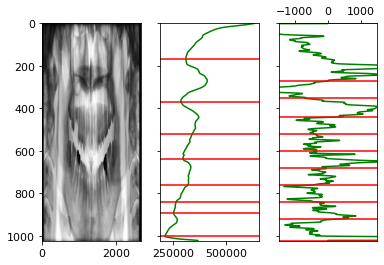

In [47]:
data_dir = '..' / Path(os.getenv('DATASET_DIR'))

image_number = 1

image_names = list(data_dir.glob('*000107.jpg'))
for i in range(image_number):
    fig, axs = plt.subplots(1, 3, sharey='all')

    image_name = image_names[i]
    image = cv.imread(image_name, cv.IMREAD_GRAYSCALE)
    height, width = image.shape
    hor, _ = integral_intensity_projection(image)
    hor = window_avg(hor)
    hor_slope = get_slope(hor.astype('int32'))
    index = np.array(range(height))
    window_position, window_size, valleys = get_valley_window(hor_slope, hor, window_size_0=80)

    # row i col 0
    # image = vertical_line_drawing(image, *window_position, color=0)
    axs[0].imshow(1 - image, aspect='auto', cmap='gray')
    # for v in valleys:
    #     axs[i][1].axhline(y=v, color='r')

    # row i col 1
    axs[1].plot(hor, index, 'g')
    # axs[i][1].xaxis.tick_top()
    axs[1].set_ylim(height, 0)
    for v in valleys:
        axs[1].axhline(y=v, color='r')

    # row i col 2
    axs[2].plot(hor_slope, index, 'g')
    axs[2].xaxis.tick_top()
    axs[2].set_ylim(height, 0)
    axs[2].set_xlim(-hor_slope.std(), hor_slope.std())
    for p in window_position:
        axs[2].axhline(y=p, color='r')

    a = hor_slope[valleys]
    print(a)

    plt.show()


[WindowsPath('../../Datasets/phase-2/00006145.jpg'),
 WindowsPath('../../Datasets/phase-2/00008026.jpg'),
 WindowsPath('../../Datasets/phase-2/00008075.jpg'),
 WindowsPath('../../Datasets/phase-2/00008113.jpg'),
 WindowsPath('../../Datasets/phase-2/00008117.jpg'),
 WindowsPath('../../Datasets/phase-2/00008131.jpg'),
 WindowsPath('../../Datasets/phase-2/00008136.jpg'),
 WindowsPath('../../Datasets/phase-2/00008137.jpg'),
 WindowsPath('../../Datasets/phase-2/00008140.jpg'),
 WindowsPath('../../Datasets/phase-2/00008145.jpg'),
 WindowsPath('../../Datasets/phase-2/00008152.jpg'),
 WindowsPath('../../Datasets/phase-2/00008154.jpg'),
 WindowsPath('../../Datasets/phase-2/00008155.jpg'),
 WindowsPath('../../Datasets/phase-2/00008156.jpg'),
 WindowsPath('../../Datasets/phase-2/00008157.jpg'),
 WindowsPath('../../Datasets/phase-2/00008163.jpg'),
 WindowsPath('../../Datasets/phase-2/00008166.jpg'),
 WindowsPath('../../Datasets/phase-2/00008169.jpg'),
 WindowsPath('../../Datasets/phase-2/00008174.